In [4]:
# Import the functions used in this project
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [149]:
from sklearn.metrics import log_loss
from sklearn.naive_bayes import MultinomialNB
def fitNaiveBayesModel(X, y):
    return MultinomialNB().fit(X, y)
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [143]:
from sklearn.metrics import log_loss

In [2]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [146]:
df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")
df_test_fl = pd.read_csv("Feature_matrix/df_test_fl_201807291908.csv")

In [142]:
nor_train_fl = pd.read_csv("Feature_matrix/Normalized_train_fl_201808020202.csv")

In [163]:
nor_train_dd = pd.read_csv("Feature_matrix/Normalized_train_dd_201808012338.csv")

In [147]:
def getGroupByDf(df):
    cols = [col for col in df.columns if col not in ["VisitNumber", "TripType"]]
    npsum = [np.sum for col in cols]
    agg_dict = dict(zip(cols, npsum))
    return df.groupby("TripType").agg(agg_dict).reset_index()

def getColsToFit(df, is_need_return = True):
    if is_need_return:
        return [col for col in df.columns if col not in ["VisitNumber", "TripType"]]
    return [col for col in df.columns if col not in ["VisitNumber", "TripType", "Return"]]

In [151]:
cols_fl = getColsToFit(df_train_fl, is_need_return = True)
cols_dd = getColsToFit(df_train_dd, is_need_return = True)

In [150]:
group_nor_fl = getGroupByDf(nor_train_fl)

In [164]:
group_nor_dd = getGroupByDf(nor_train_dd)

In [156]:
y = group_nor_fl["TripType"]

In [153]:
X = group_nor_fl[cols_fl]

In [158]:
model1 = fitNaiveBayesModel(X, y)

In [160]:
y_pred1 = model1.predict(df_train_fl[cols_fl])

In [162]:
af.getAccuracy(df_train_fl["TripType"], y_pred1, len(df_train_fl))

##### Accuracy : 0.5813

In [167]:
group_nor_dd = group_nor_dd.set_index("TripType")

In [183]:
def getNormalizedDf(df, cols):
    result = df.copy()
    result = result[cols]
    for i in range(len(df)):
        triptype = df.loc[i]["TripType"]
        length = dict_len_by_tt[triptype]
        result.loc[i] = round(result.loc[i]/length, 2)
    return result

In [184]:
li_train_by_vn = []
for i in df_train_dd["TripType"].unique():
    tmp = df_train_dd[df_train_dd["TripType"] == i]
    li_train_by_vn.append(tmp)
    
length_train_by_triptype = []
triptype_li = []
for i in range(len(li_train_by_vn)):
    length_train_by_triptype.append(len(li_train_by_vn[i]))
    triptype_li.append(li_train_by_vn[i]["TripType"].unique()[0])

In [218]:
group_nor_fl[cols_fl] = group_nor_fl[cols_fl]/100

In [191]:
group_nor_dd[cols_dd] = group_nor_dd[cols_dd]/100

In [193]:
group_nor_dd_1 = getNormalizedDf(group_nor_dd.reset_index(), cols_dd)

In [185]:
dict_len_by_tt = dict(zip(triptype_li, length_train_by_triptype))

In [181]:
cmap = sns.light_palette("gray", as_cmap=True)

In [227]:
S_fl = sk.preprocessing.normalize(group_nor_fl_1)

In [228]:
S_fl = np.dot(S_fl, S_fl.T)

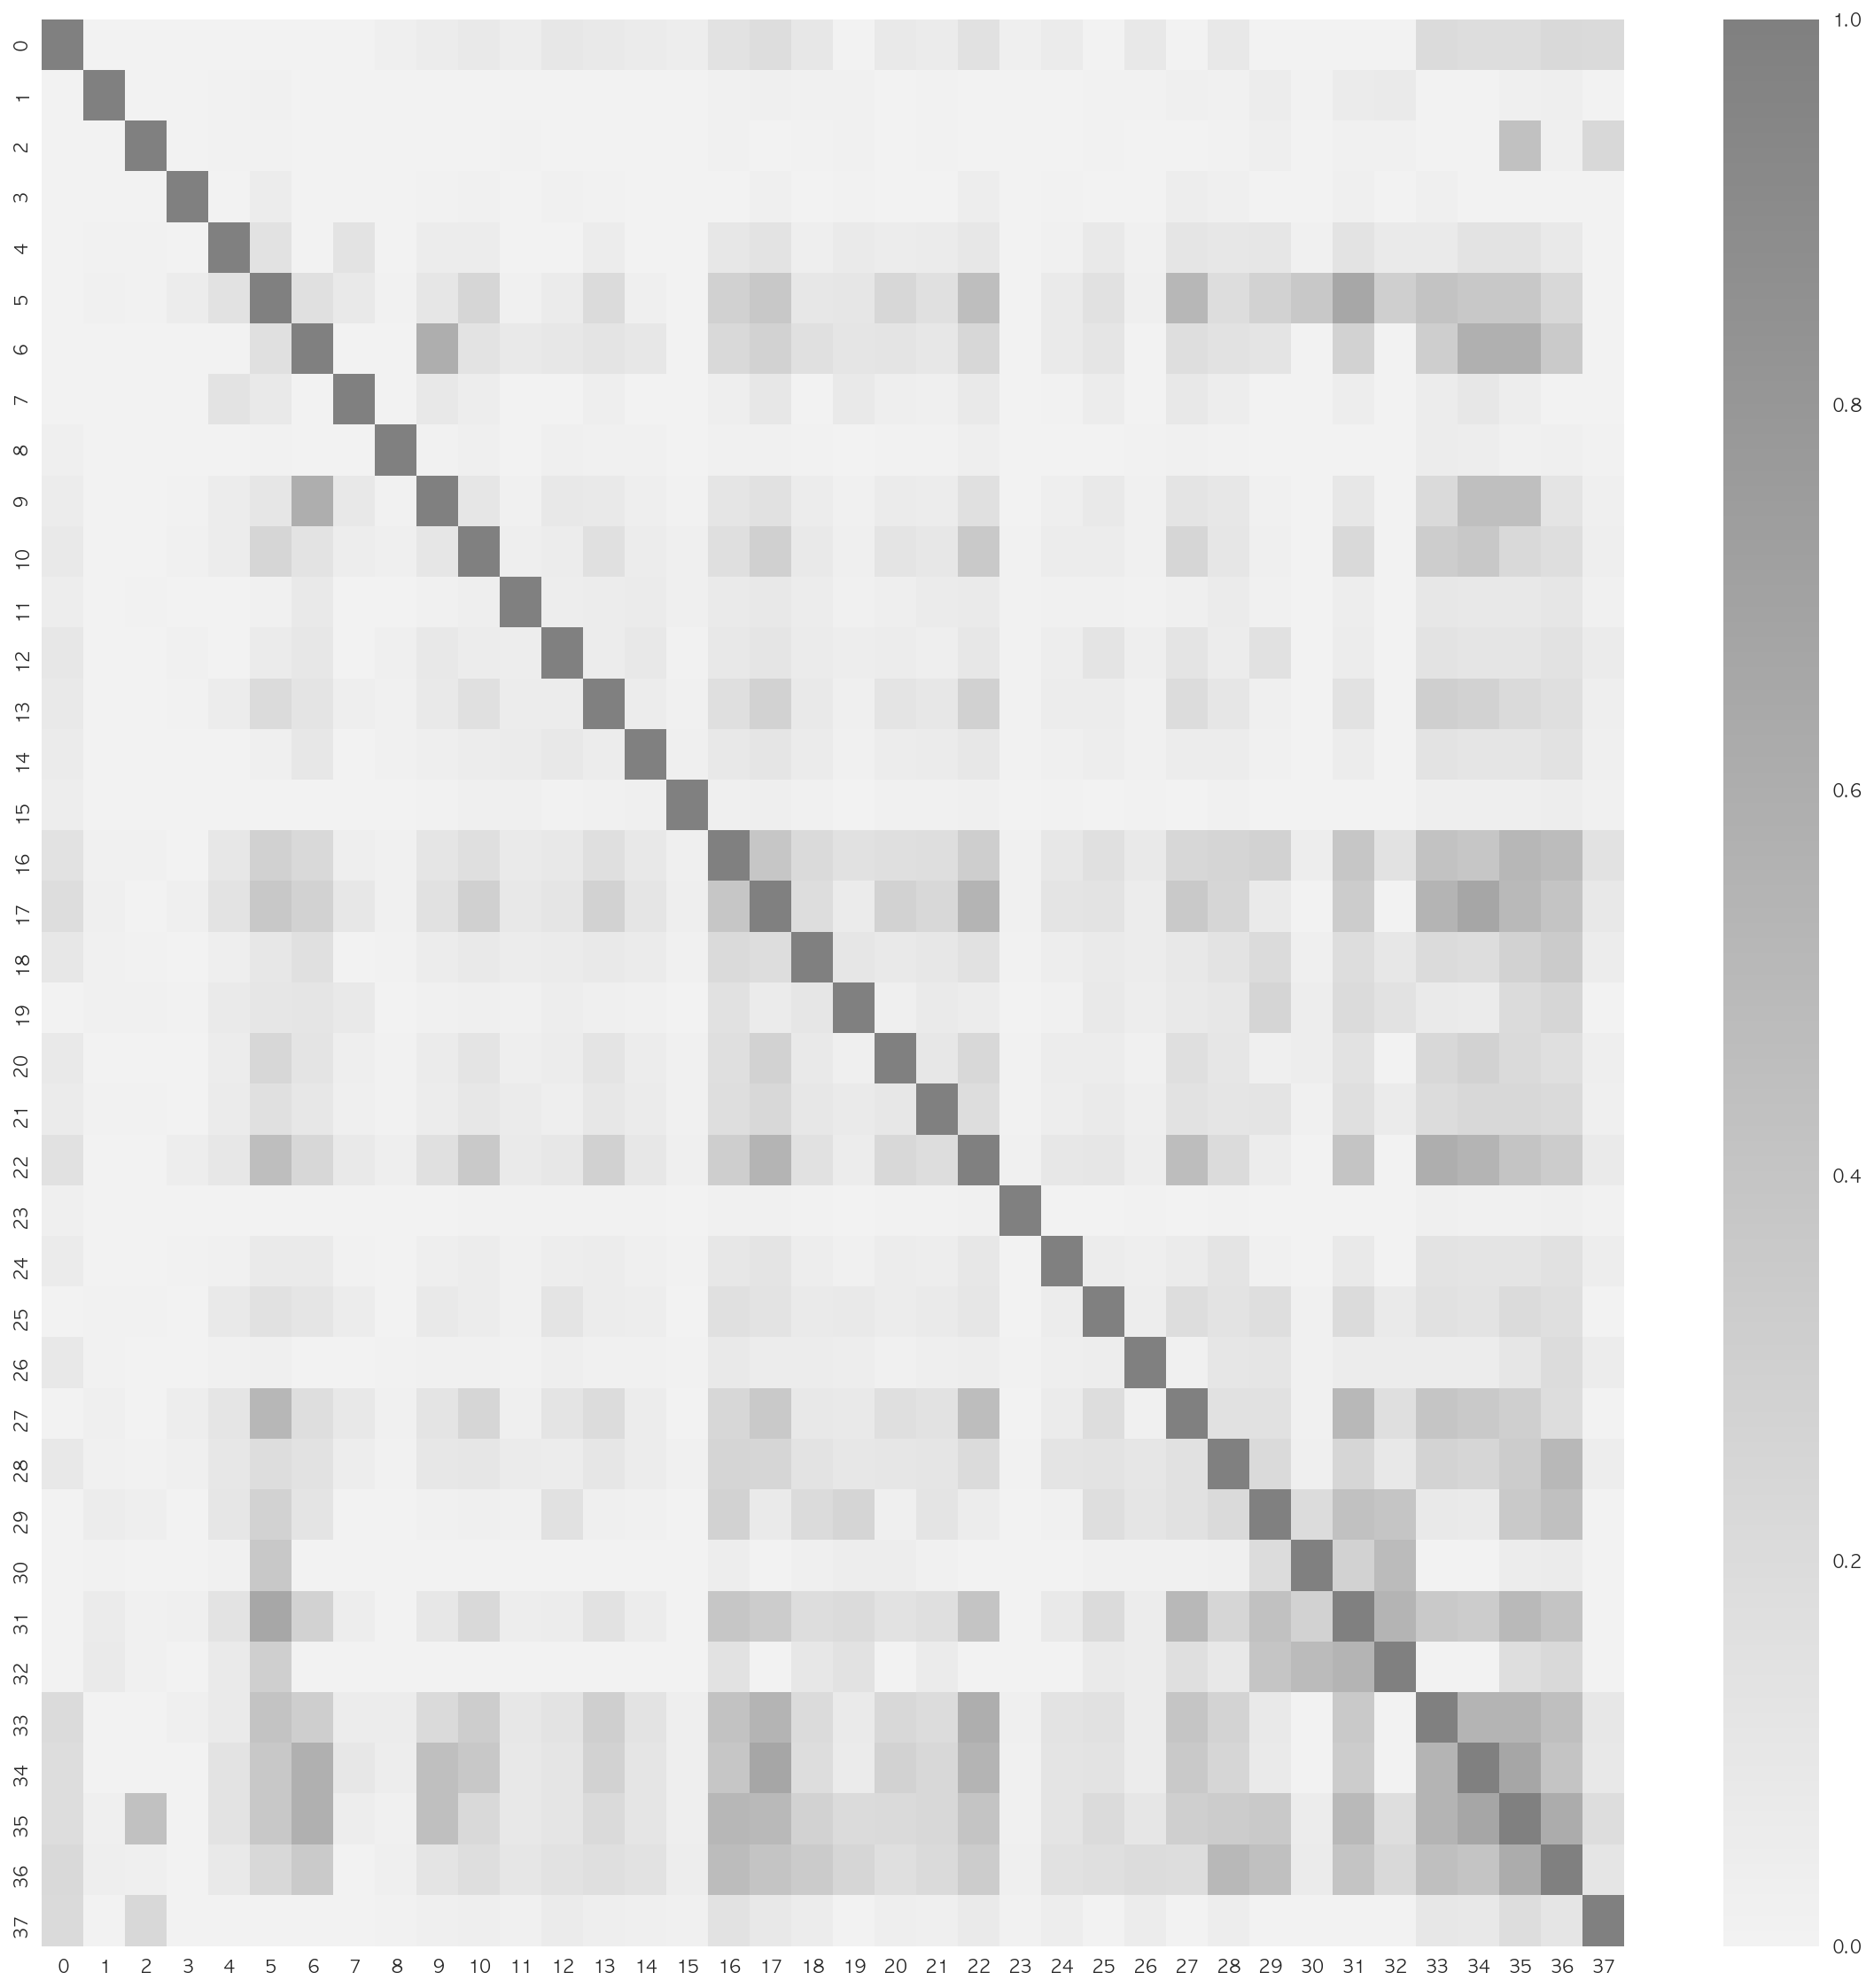

In [229]:
plt.figure(figsize=(20,20))
sns.heatmap(S_fl, cmap=cmap)
plt.show()

# fl dummies로 바라본 triptype간의 유사도

In [209]:
S = sk.preprocessing.normalize(group_nor_dd_1)

In [210]:
S = np.dot(S, S.T)

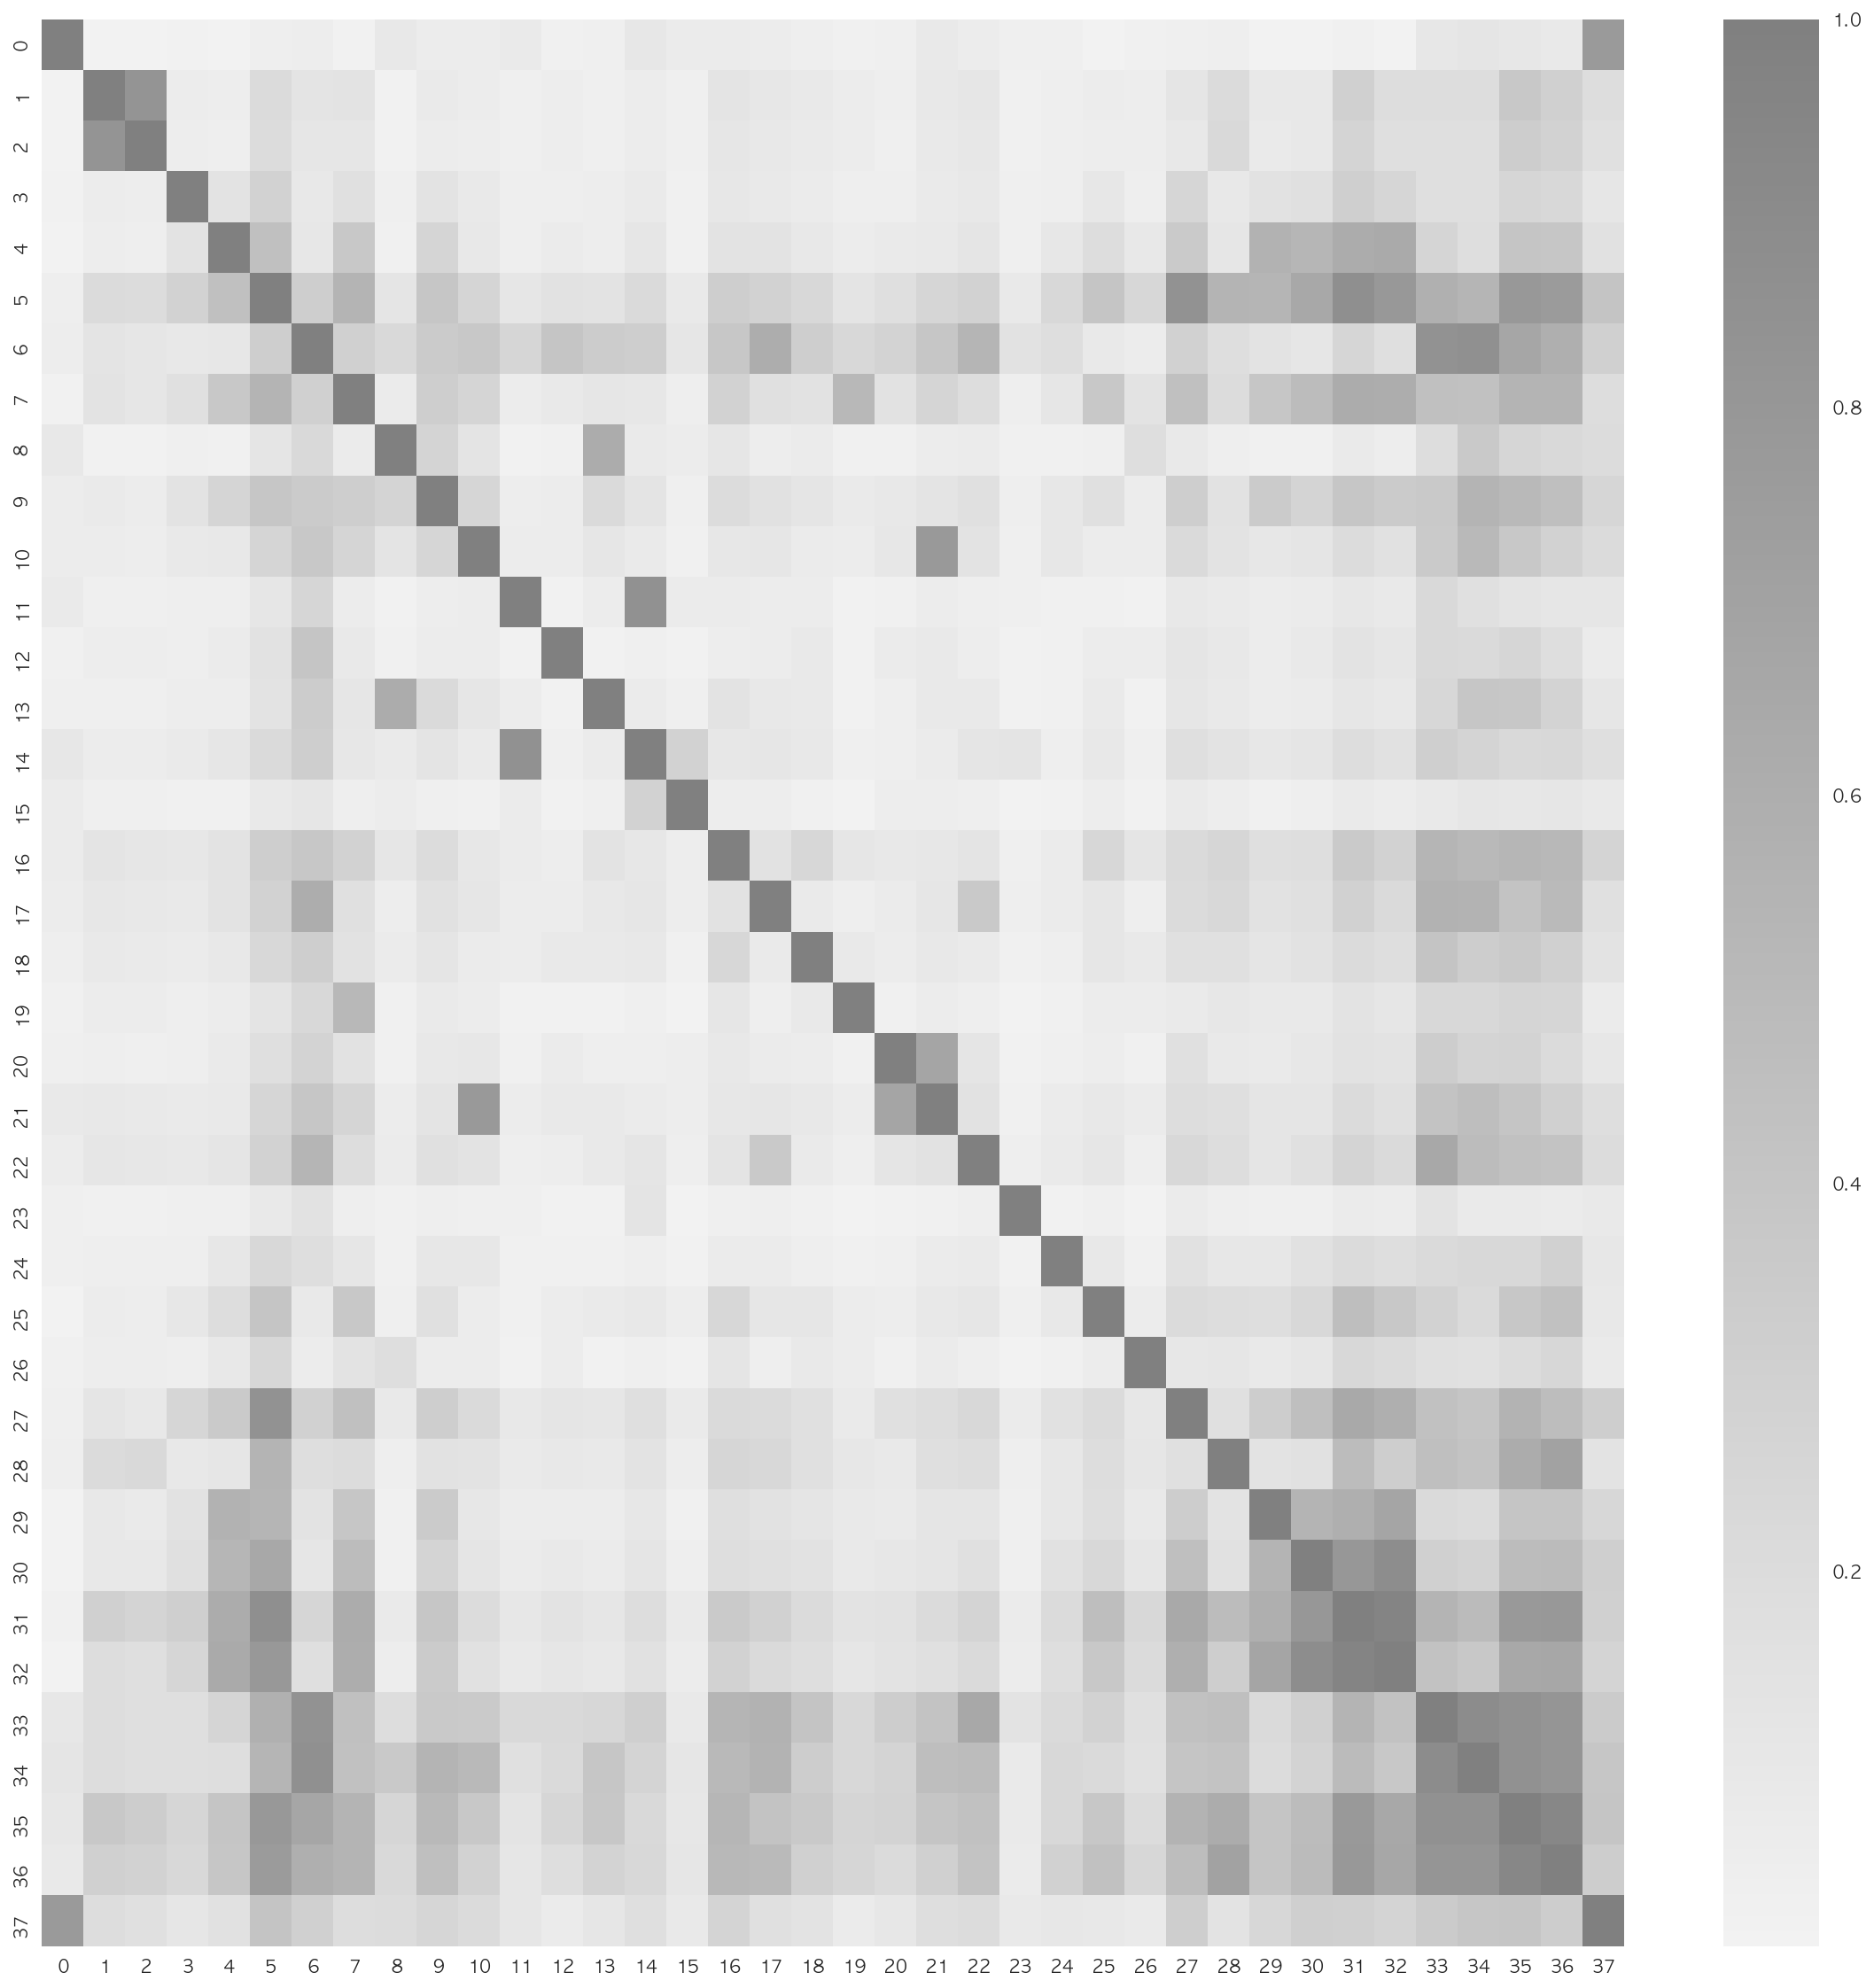

In [217]:
plt.figure(figsize=(20,20))
sns.heatmap(S, cmap=cmap)
plt.show()

# dd dummies로 바라본 triptype간의 유사도

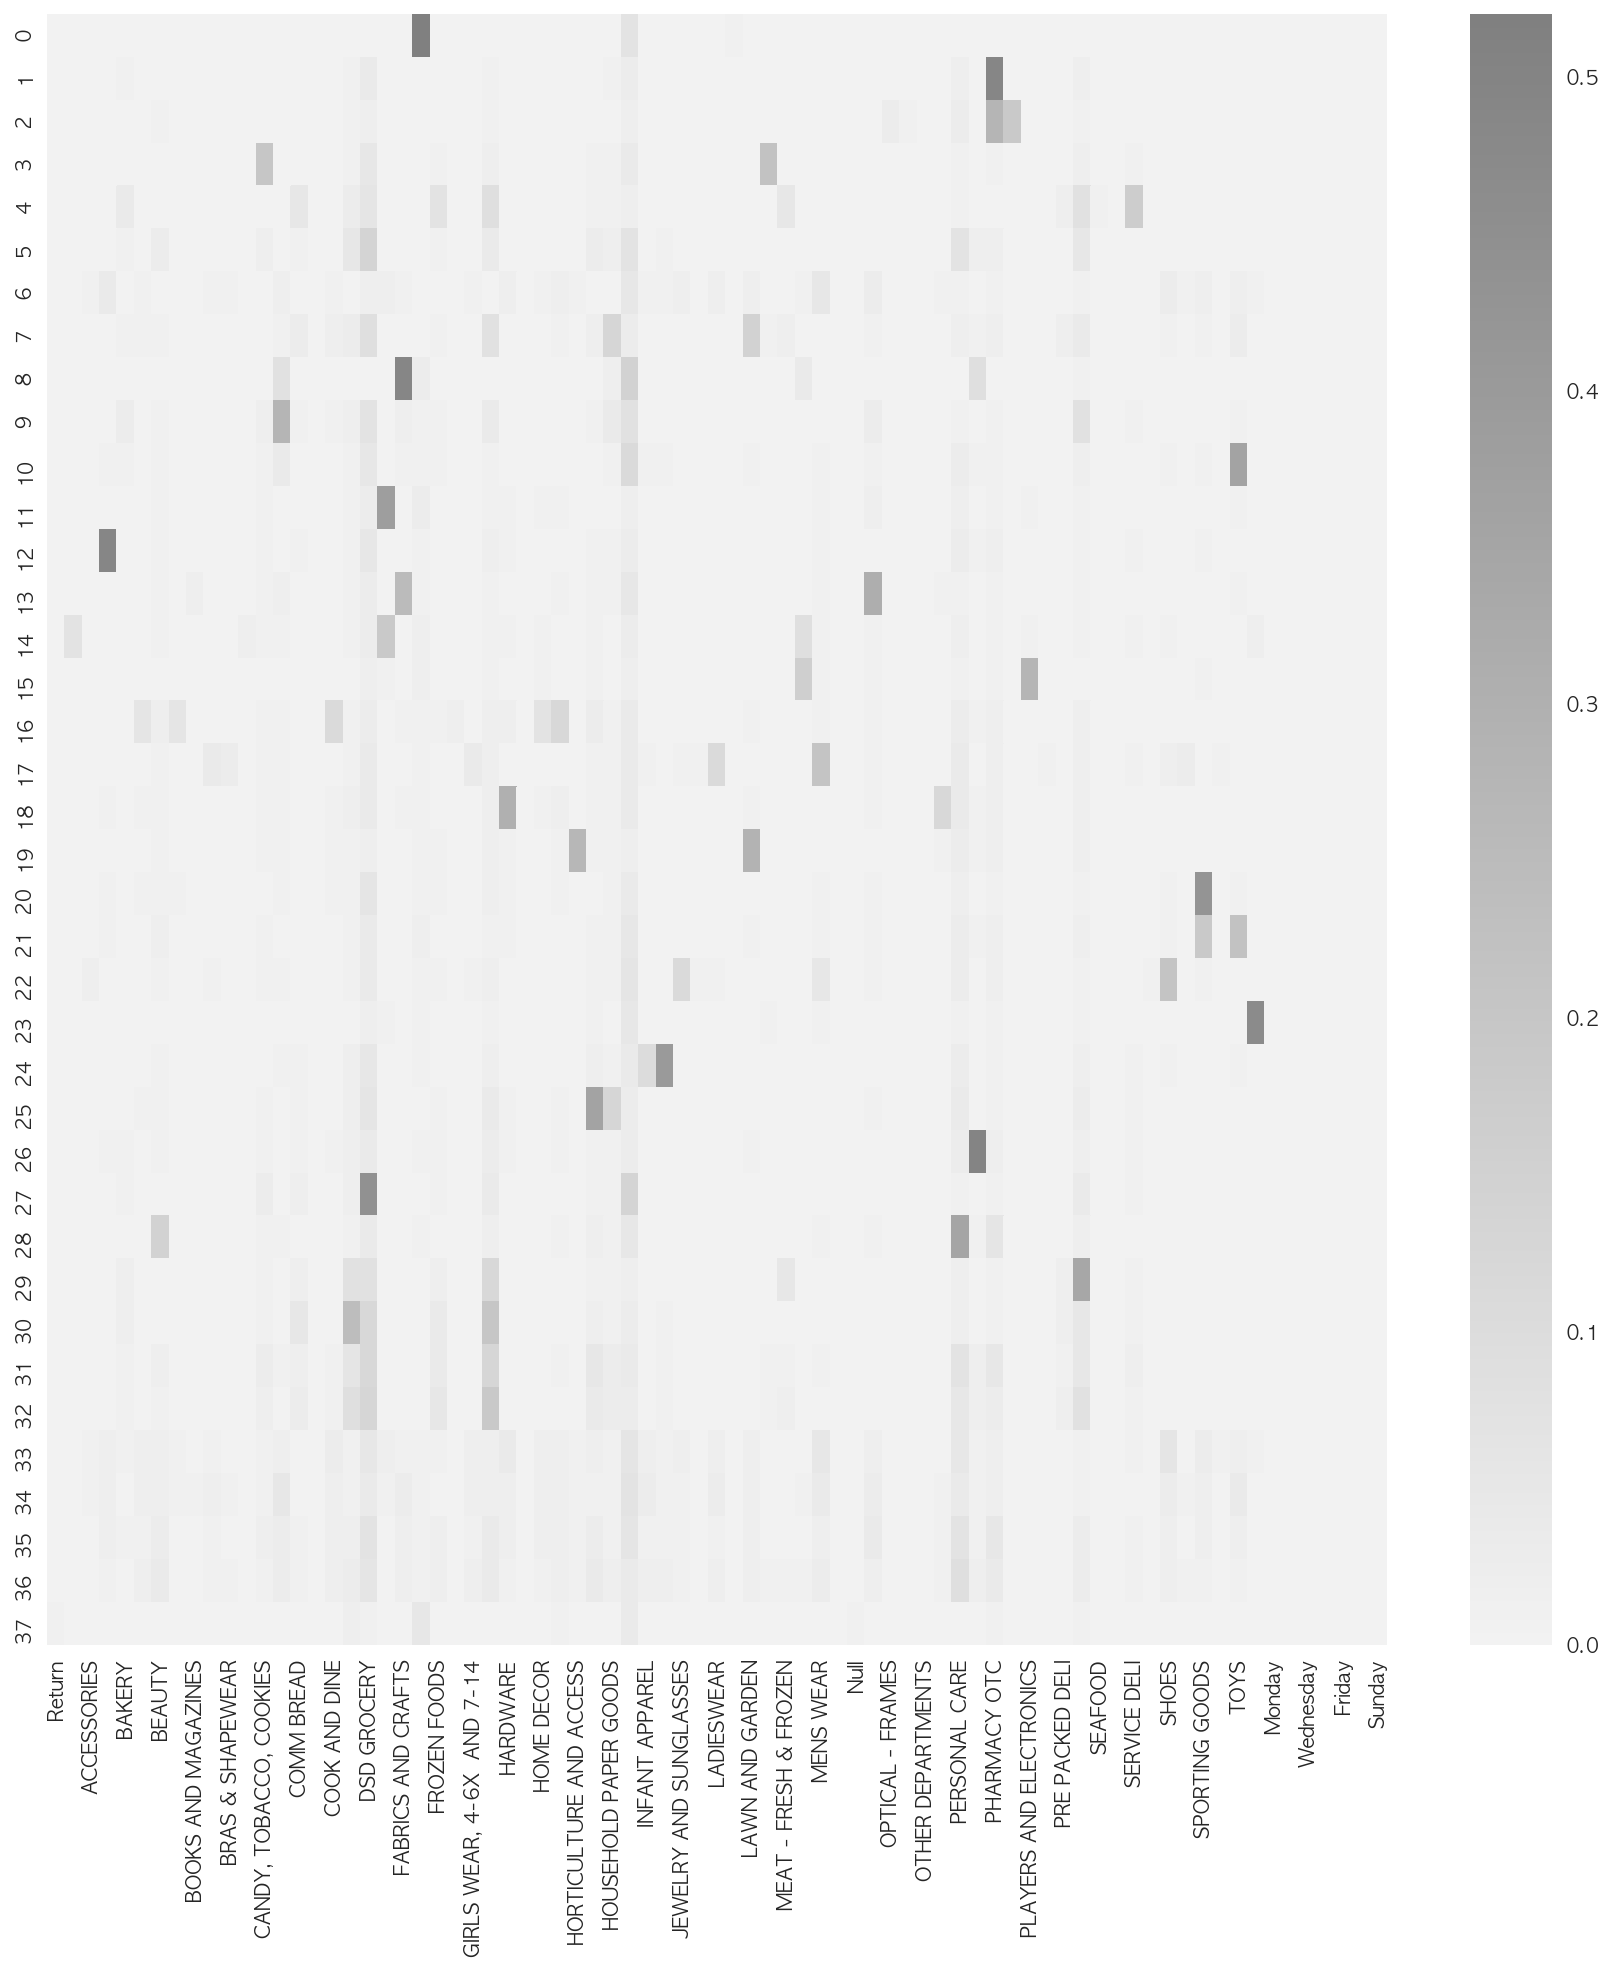

In [195]:
plt.figure(figsize=(15, 15))
sns.heatmap(group_nor_dd_1, cmap=cmap)
plt.show()

In [306]:
from IPython.display import display, Markdown

In [38]:
df_train_dd[cols_dd[:-7]] = df_train_dd[cols_dd[:-7]].div(df_scancount.Total, axis=0)

In [51]:
df_train_dd[cols_dd[:-7]] = df_train_dd[cols_dd[:-7]]*100

In [64]:
groupby_dd = getGroupByDf(df_train_dd)

In [53]:
X, y = af.get_df_to_fit(df_train_dd)

In [91]:
X_fl, y = af.get_df_to_fit(df_train_fl)

In [98]:
X_fl_added_total = pd.concat([X_fl, df_scancount], axis=1)

In [99]:
model_nb_fl_total = fitNaiveBayesModel(X_fl_added_total, y)

In [100]:
y_pred_fl_total = model_nb_fl_total.predict(X_fl_added_total)

In [101]:
af.getAccuracy(y, y_pred_fl_total, len(X))

##### Accuracy : 0.5805

In [103]:
y_pred_dd_proba_fl_total = model_nb_fl_total.predict_proba(X_fl_added_total)

In [104]:
log_loss(df_train_dd["TripType"], y_pred_dd_proba_fl_total)

10.997427453772568

In [106]:
print(classification_report(y, y_pred_fl_total))

             precision    recall  f1-score   support

          3       0.89      0.93      0.91      3643
          4       0.51      0.98      0.67       346
          5       0.84      0.69      0.75      4593
          6       0.66      0.84      0.74      1277
          7       0.79      0.69      0.74      5752
          8       0.62      0.19      0.29     12161
          9       0.66      0.08      0.14      9464
         12       0.22      0.88      0.35       269
         14       0.02      1.00      0.05         4
         15       0.38      0.80      0.52       978
         18       0.36      0.89      0.51       549
         19       0.35      0.92      0.51       375
         20       0.33      0.84      0.47       637
         21       0.37      0.89      0.53       641
         22       0.48      0.83      0.61       928
         23       0.39      0.98      0.56       139
         24       0.63      0.69      0.66      2609
         25       0.62      0.72      0.67   

In [92]:
model_nb_fl = fitNaiveBayesModel(X_fl, y)

In [93]:
y_pred_fl = model_nb_fl.predict(X_fl)

In [94]:
af.getAccuracy(y, y_pred_fl, len(X))

##### Accuracy : 0.5655

In [95]:
y_pred_dd_proba_fl = model_nb_fl.predict_proba(X_fl)

In [97]:
log_loss(df_train_dd["TripType"], y_pred_dd_proba_fl)

11.288355902027858

In [135]:
df_train_dd = pd.read_csv("Feature_matrix/Normalized_train_dd_201808012338.csv")

In [138]:
X_nor_dd, y = af.get_df_to_fit(df_train_dd)

In [139]:
model_nb_normal_dd = fitNaiveBayesModel(X_nor_dd, y)

In [140]:
y_pred_nb_normal_dd = model_nb_normal_dd.predict(X_nor_dd)

In [141]:
af.getAccuracy(y, y_pred_nb_normal_dd, len(X))

##### Accuracy : 0.4314

In [136]:
normal_dd = getGroupByDf(df_train_dd)

In [121]:
X, y = af.get_df_to_fit(df_train_dd)

In [123]:
X = X[cols_dd[:-7]]

In [125]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")

In [126]:
X_dd, y = af.get_df_to_fit(df_train_dd)

In [127]:
X_dd_concat = pd.concat([X_dd, X], axis = 1)

In [117]:
X

range(0, 69)

In [ ]:
pd.concat([df_train_dd, X]

In [129]:
model_nb_dd_concat = fitNaiveBayesModel(X_dd_concat, y)

In [130]:
y_pred_dd_concat = model_nb_dd_concat.predict(X_dd_concat)

In [131]:
af.getAccuracy(y, y_pred_dd_concat, len(X))

##### Accuracy : 0.4514

In [133]:
y_pred_dd_concat_proba = model_nb_dd_concat.predict_proba(X_dd_concat)

In [134]:
log_loss(df_train_dd["TripType"], y_pred_dd_concat_proba)

15.661424099473379

In [54]:
model_nb = fitNaiveBayesModel(X, y)

In [55]:
y_pred = model_nb.predict(X)

In [79]:
y_pred_dd_proba = model_nb.predict_proba(X)

In [56]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.4314

In [81]:
y_pred_dd_proba

array([[1.02495714e-003, 1.49281766e-004, 1.65478293e-003, ...,
        5.08989289e-004, 9.21742171e-004, 9.49977149e-001],
       [8.69697331e-119, 7.75214638e-090, 1.51244255e-068, ...,
        4.22549051e-030, 2.91766450e-026, 6.60362816e-075],
       [1.07014681e-191, 1.33296860e-163, 2.07545178e-158, ...,
        1.26793696e-072, 4.16375284e-072, 6.83693807e-129],
       ...,
       [5.66782585e-139, 1.11061743e-044, 7.97658057e-050, ...,
        8.04286621e-026, 1.36335392e-021, 1.09323145e-056],
       [4.81656505e-163, 2.64411445e-062, 2.69008604e-063, ...,
        6.11449437e-039, 1.09870197e-034, 6.56565791e-067],
       [8.66592807e-155, 1.01903278e-090, 1.92434227e-085, ...,
        1.99354291e-064, 6.33932248e-055, 1.90872489e-053]])

In [80]:
log_loss(df_train_dd["TripType"], y_pred_dd_proba)

15.731142200605372

In [57]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          3       0.80      0.87      0.84      3643
          4       0.11      0.84      0.19       346
          5       0.93      0.41      0.57      4593
          6       0.50      0.83      0.63      1277
          7       0.64      0.61      0.62      5752
          8       0.15      0.03      0.04     12161
          9       0.20      0.01      0.02      9464
         12       0.09      0.36      0.14       269
         14       0.01      0.75      0.01         4
         15       0.30      0.53      0.38       978
         18       0.29      0.66      0.41       549
         19       0.25      0.77      0.38       375
         20       0.35      0.85      0.49       637
         21       0.28      0.64      0.39       641
         22       0.44      0.28      0.34       928
         23       0.21      0.85      0.34       139
         24       0.49      0.68      0.57      2609
         25       0.51      0.74      0.61   

In [232]:
def getNeuralNetworkInfo(hist):
    print("val_acc : ")
    print(np.max(hist.history["val_acc"]))
    print("val_loss : ")
    print(np.min(hist.history["val_loss"]))
    plt.plot(hist.history['loss'])
    plt.show()
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="test")
    plt.legend()
    plt.show()

In [231]:
from keras.models import Sequential
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils

Using TensorFlow backend.


In [261]:
X, y = af.get_df_to_fit(df_train_fl)

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [278]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.fit_transform(y_test)

# y_pred = lb.inverse_transform(np.round(predictions))
# y_true = lb.inverse_transform(train_y)

In [264]:
X_train.shape

(57404, 5362)

In [279]:
model1 = Sequential()
model1.add(Dense(150, input_dim=5362, activation="sigmoid", kernel_initializer="glorot_uniform"))
# model1.add(Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform"))
model1.add(Dense(38, activation="softmax"))
model1.compile(optimizer=Adagrad(lr=1.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [280]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=500, batch_size=500, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 21s - loss: 14.3207 - acc: 0.0995 - val_loss: 14.3827 - val_acc: 0.1068
Epoch 2/500
 - 18s - loss: 14.2516 - acc: 0.1138 - val_loss: 13.9196 - val_acc: 0.1330
Epoch 3/500
 - 18s - loss: 9.9930 - acc: 0.2149 - val_loss: 2.7244 - val_acc: 0.3698
Epoch 4/500
 - 18s - loss: 2.0788 - acc: 0.4882 - val_loss: 1.8730 - val_acc: 0.5366
Epoch 5/500
 - 18s - loss: 1.4005 - acc: 0.6323 - val_loss: 1.7715 - val_acc: 0.5665
Epoch 6/500
 - 18s - loss: 1.0781 - acc: 0.7108 - val_loss: 1.7977 - val_acc: 0.5812
Epoch 7/500
 - 18s - loss: 0.8726 - acc: 0.7648 - val_loss: 1.8566 - val_acc: 0.5849
Epoch 8/500
 - 18s - loss: 0.7265 - acc: 0.8064 - val_loss: 1.9479 - val_acc: 0.5866
Epoch 9/500
 - 19s - loss: 0.6204 - acc: 0.8380 - val_loss: 2.0365 - val_acc: 0.5844
Epoch 10/500
 - 18s - loss: 0.5412 - acc: 0.8610 - val_loss: 2.1304 - val_acc: 0.5840
Epoch 11/500
 - 18s - loss: 0.4763 - acc: 0.8813 - val_loss: 2.2215 - val_acc: 0.5810
Epoch 12/

KeyboardInterrupt: 

In [271]:
X_test = X_test.drop("index", axis=1)

In [268]:
X_test = af.get_df_to_fit(df_test_fl, True)

In [272]:
pred_proba = model1.predict_proba(X_test)

In [273]:
submit = af.make_submission_df(submission, pred_proba)

In [274]:
af.saveDataFrameToCsv(submit, "neural_network_9285")

In [304]:
tmp = df_train.groupby(["VisitNumber", "TripType", "DepartmentDescription"]).agg({"ScanCount" : np.max}).reset_index()

In [305]:
tmp

,VisitNumber,TripType,DepartmentDescription,ScanCount
0,5,999,FINANCIAL SERVICES,-1
1,7,30,PERSONAL CARE,1
2,7,30,SHOES,1
3,8,26,DAIRY,2
4,8,26,DSD GROCERY,1
5,8,26,HOUSEHOLD CHEMICALS/SUPP,1
6,8,26,MEAT - FRESH & FROZEN,1
7,8,26,PAINT AND ACCESSORIES,2
8,8,26,PETS AND SUPPLIES,3
9,9,8,IMPULSE MERCHANDISE,1


In [7]:
tmp = df_train.groupby(["TripType", "DepartmentDescription","FinelineNumber"]).sum()["ScanCount"].reset_index()

In [10]:
col_count = 0
for tt in tmp["TripType"].unique():
    col_count += len(tmp[tmp["TripType"] == tt])

In [11]:
col_count

86022

In [9]:
tmp[tmp["TripType"] == 3]

,TripType,DepartmentDescription,FinelineNumber,ScanCount
0,3,1-HR PHOTO,110.0,1
1,3,1-HR PHOTO,170.0,1
2,3,ACCESSORIES,812.0,1
3,3,ACCESSORIES,920.0,1
4,3,AUTOMOTIVE,103.0,2
5,3,AUTOMOTIVE,900.0,4
6,3,AUTOMOTIVE,905.0,1
7,3,AUTOMOTIVE,910.0,1
8,3,AUTOMOTIVE,1040.0,1
9,3,AUTOMOTIVE,1510.0,1


In [300]:
tmp2 = tmp.groupby(["VisitNumber", "FinelineNumber", "DepartmentDescription"]).agg({"TripType" : np.max, "ScanCount" : np.max})

In [303]:
tmp2[tmp2["TripType"] == 4]

TripType  ScanCount
VisitNumber FinelineNumber DepartmentDescription                     
130         1110.0         PHARMACY OTC                  4          2
            1121.0         PHARMACY OTC                  4          2
            2124.0         PHARMACY OTC                  4          1
            4253.0         GROCERY DRY GOODS             4          1
            4291.0         GROCERY DRY GOODS             4          1
279         1181.0         PHARMACY OTC                  4          1
433         1303.0         PHARMACY OTC                  4          1
472         135.0          IMPULSE MERCHANDISE           4          1
            1110.0         PHARMACY OTC                  4          1
            1121.0         PHARMACY OTC                  4          1
            1300.0         PHARMACY OTC                  4          1
            2005.0         PHARMACY OTC                  4          1
            3516.0         PHARMACY OTC                  4          1
1328        1118.0         PHARMACY OTC                  4          1
1575        4078.0         PHARMACY OTC                  4          1
            4081.0         PHARMACY OTC                  4          1
            4253.0         GROCERY DRY GOODS             4          1
            5501.0         PRODUCE                       4          1
            8101.0         PERSONAL CARE                 4          1
2707        1110.0         PHARMACY OTC                  4          2
            1300.0         PHARMACY OTC                  4          1
2715        1110.0         PHARMACY OTC                  4          1
2951        1303.0         PHARMACY OTC                  4          1
3082        1303.0         PHARMACY OTC                  4          1
3633        1303.0         PHARMACY OTC                  4          1
4003        1118.0         PHARMACY OTC                  4          1
4140        1181.0         PHARMACY OTC                  4          1
            4606.0         DSD GROCERY                   4          1
4189        1110.0         PHARMACY OTC                  4          1
            2267.0         BEAUTY                        4          1
...                                                    ...        ...
184158      4084.0         PHARMACY OTC                  4          1
184982      337.0          IMPULSE MERCHANDISE           4          1
            1110.0         PHARMACY OTC                  4          1
            1118.0         PHARMACY OTC                  4          1
            4606.0         DSD GROCERY                   4          1
            4611.0         DSD GROCERY                   4          1
            5010.0         HOUSEHOLD PAPER GOODS         4          1
            5510.0         HOUSEHOLD PAPER GOODS         4          1
185286      1110.0         PHARMACY OTC                  4          1
            4079.0         PHARMACY OTC                  4          1
            5501.0         PRODUCE                       4          1
            8015.0         SERVICE DELI                  4          2
            8016.0         SERVICE DELI                  4          1
            8027.0         SERVICE DELI                  4          1
            9211.0         DSD GROCERY                   4          1
185536      1181.0         PHARMACY OTC                  4         30
185805      1118.0         PHARMACY OTC                  4          1
            1121.0         PHARMACY OTC                  4          1
            3006.0         DSD GROCERY                   4          5
            3466.0         DSD GROCERY                   4          1
186984      1121.0         PHARMACY OTC                  4          3
190135      1118.0         PHARMACY OTC                  4          1
            7410.0         PETS AND SUPPLIES             4          1
190198      135.0          IMPULSE MERCHANDISE           4          3
            338.0          IMPULSE MERCHANDISE           4  

In [309]:
from patsy import dmatrix